In [4]:
# Import the necessary modules
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split 
import pandas as pd

from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error



import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

# Magic to tell python notebook we want matplotlib charts included
%matplotlib inline

In [5]:
df = pd.read_json("training_set.json")

In [6]:
df.iloc[0]

sentiment                                               -0.463
snippet                                              downgrade
target                                                   $PCAR
tweet        downgrades $SON $ARI $GG $FLTX $WMC $MFA $IVR ...
Name: 0, dtype: object

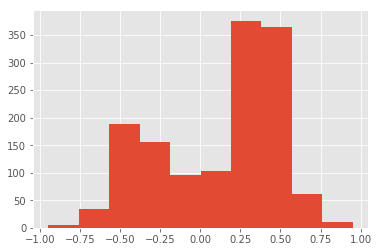

In [26]:
df.sentiment.hist()

In [27]:
import numpy as np

conditions = [
    (df['sentiment'] == 0) , 
    (df['sentiment'] <  0) ,
    (df['sentiment'] >  0)]
choices = ['neutral', 'bullish', 'bearish']
df['classes'] = np.select(conditions, choices, default='neutral')
print(df)

      sentiment                                            snippet  target  \
0        -0.463                                          downgrade   $PCAR   
1         0.678       [looking sexy this morning, break on volume]   $AMZN   
2         0.377                               still long term fan!   $SBUX   
3         0.129  $TFM will have a way to go price wise to compe...     $KR   
4         0.395      iPhone SE Could Be Doing Better Than Expected   $AAPL   
5         0.458      Now up to 200 stocks making new 52 week highs    $TJX   
6         0.288  There's no reason why $GOOGL can't get back to...  $GOOGL   
7        -0.453                                              short   $CVEO   
8         0.372               Pivotal sees 27% upside for Alphabet   $YHOO   
9         0.216                                  the most trending   $DWTI   
10        0.241  $GOOGL patents turn signal detector for autono...  $GOOGL   
11        0.557            Investor long-term stock recommendati

In [28]:
print(df['classes'].value_counts(dropna=False))

bearish    917
bullish    455
neutral     24
Name: classes, dtype: int64


In [29]:
df['target'].value_counts(dropna=False)
print()

In [30]:
#checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1396 entries, 0 to 1395
Data columns (total 5 columns):
sentiment    1396 non-null float64
snippet      1396 non-null object
target       1396 non-null object
tweet        1396 non-null object
classes      1396 non-null object
dtypes: float64(1), object(4)
memory usage: 54.6+ KB


In [31]:
df.columns

Index(['sentiment', 'snippet', 'target', 'tweet', 'classes'], dtype='object')

In [32]:
import wordcloud

Bullish words


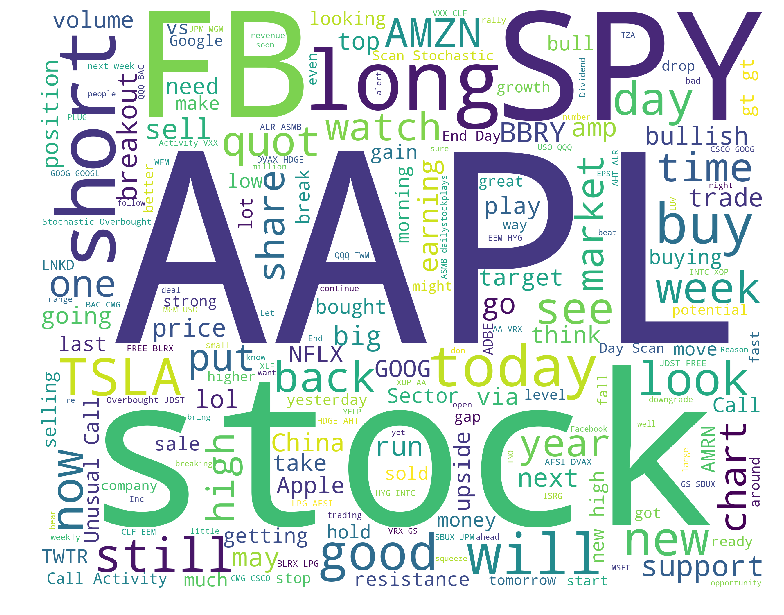

Bearish words


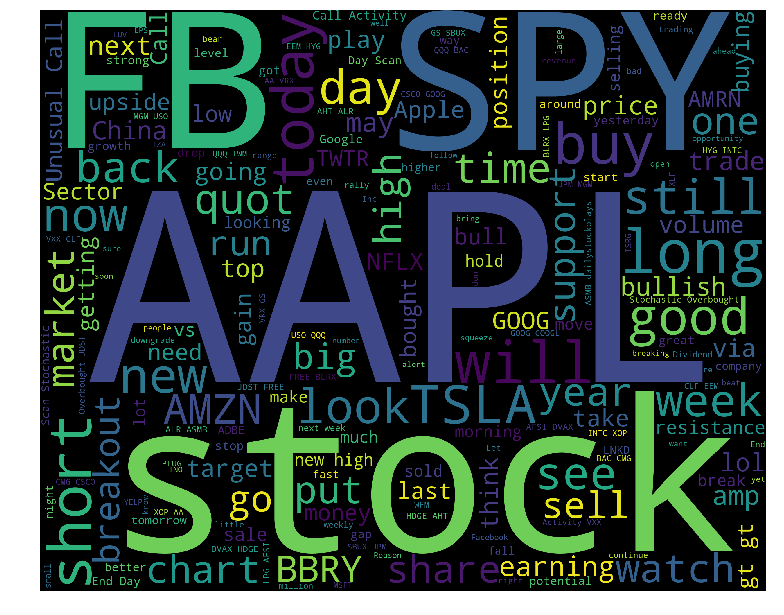

In [34]:
from wordcloud import WordCloud,STOPWORDS

train_pos = df[ df['classes'] == 'bullish']
train_pos = df['tweet']
train_neg = df[ df['classes'] == 'bearish']
train_neg = df['tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Bullish words")
wordcloud_draw(train_pos,'white')
print("Bearish words")
wordcloud_draw(train_neg)

## N - Grams

In [13]:
import nltk
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

pos_tweet = ""
# neg_tweet = ""
# for data in df:
#     if data['sentiment'] > 0:
#         pos_tweet = pos_tweet _  
finder = nltk.collocations.BigramCollocationFinder.from_words(df.tweet)
finder.nbest(bigram_measures.pmi, 50)
finder.ngram_fd.viewitems()

AttributeError: 'FreqDist' object has no attribute 'viewitems'

In [20]:
from nltk import Text
from nltk import word_tokenize
collection = ""

for tweet in df.tweet: 
    collection = collection + tweet
    
collection = word_tokenize(collection)
collection = Text(collection)
collection.collocations()

Call Activity; Stochastic Overbought; Day Scan; Bollinger Band;
Activity https; BHP +3.04; MCP +1.56; SLW +1.68; Upper Bollinger; RIO
+4.54; new highs; FCX +3.53; FXI +2.93; CAT +5.10; Market Losers;
Setups Looking; HAL +1.49; 12/31/2012 close; .Really Nice; YHOO +2.61


# Cash Tag
## What is the number of cashtag in the tweets 
### consider coverting cashtag to a standard for to remove the polarity of the word

In [ ]:
#   \s([$][\w_-]+)
#    r'\s([$][A-Z]+)'       |   regular expression that obmit the $12 only cashtag since cashtag is alpha

## Preprocessing of tweets

## Part 1: Lower Case

In [ ]:
df['tweet'] = df['tweet'].str.lower()

df.tweet[:10]

## Part 2 Replace @mentions with @user

In [ ]:
#    /^(?!.*\bRT\b)(?:.+\s)?@\w+/i
#    ^(?!.*?RT\s).+\s@\w+
#    \s([@][\w_-]+)

df['tweet'] = df['tweet'].str.replace('([@][\w_-]+)', ' @mentions ', case=False)

df.tweet[:10]

# Replace Cashtag with @CashTag ??

In [ ]:
# '\s([$][a-z]+)'

df['tweet'] = df['tweet'].str.replace('\s([$][a-z]+)', ' @cashtag ', case=False)

df.tweet[:10]

## Part 3: Replace All the URL with url

In [ ]:
df['tweet'] = df['tweet'].str.replace('http\S+|www.\S+', '@url', case=False)

df.tweet[:10]

## Part 4 : Consider +- [0-9] to #increase[0-9] 

In [ ]:
#stop words

from nltk.corpus import stopwords
import string

def text_process(mess): 
    """
        1. remove punc (i need to remove all but + - # $ and @)
        2. remove stopwords
        3. return clean words
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    



df['tweet'] = df['tweet'].apply(text_process)

df.tweet[:10]

In [ ]:
#stemming , lemmentation

## Attempt 1 to Train Model
#### without stemming, cleaning or any other cleaning to text processing. 


#create a series to store the sentiment (score) : y 

#y = df.sentiment

#Create new training and test sets. 
#The reason behind this is to craete another Test and Train 
#- then use it as a form of validation before scoring


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split( df["tweet"] , df.sentiment, test_size=0.33, random_state=53 )
#print(X_train, X_test, y_train, y_test)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = df["tweet"]
y = df["sentiment"]

X = cv.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.33, random_state=42 )

In [ ]:
print(X_train, y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
nb.fit(X_train, y_train)

In [ ]:
## prediction and evaluation

predictions = nb.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test, predictions))

In [ ]:
## TFIDF

from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('bow',CountVectorizer())
                 
                 ])
#('tfidf',TfidfTransformer())

X = df["tweet"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.33, random_state=42 )

pipe.fit(X_train, y_train)




In [ ]:
predictions = pipe.predict(X_test)